In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import seaborn as sns
#import plotly as py
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.ensemble import RandomForestClassifier as RF

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV 

In [2]:
df_faults= pd.read_csv('/Users/sattwatikundu/IITKGP_Capstone_2019/faults.csv')

In [3]:
df_faults.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


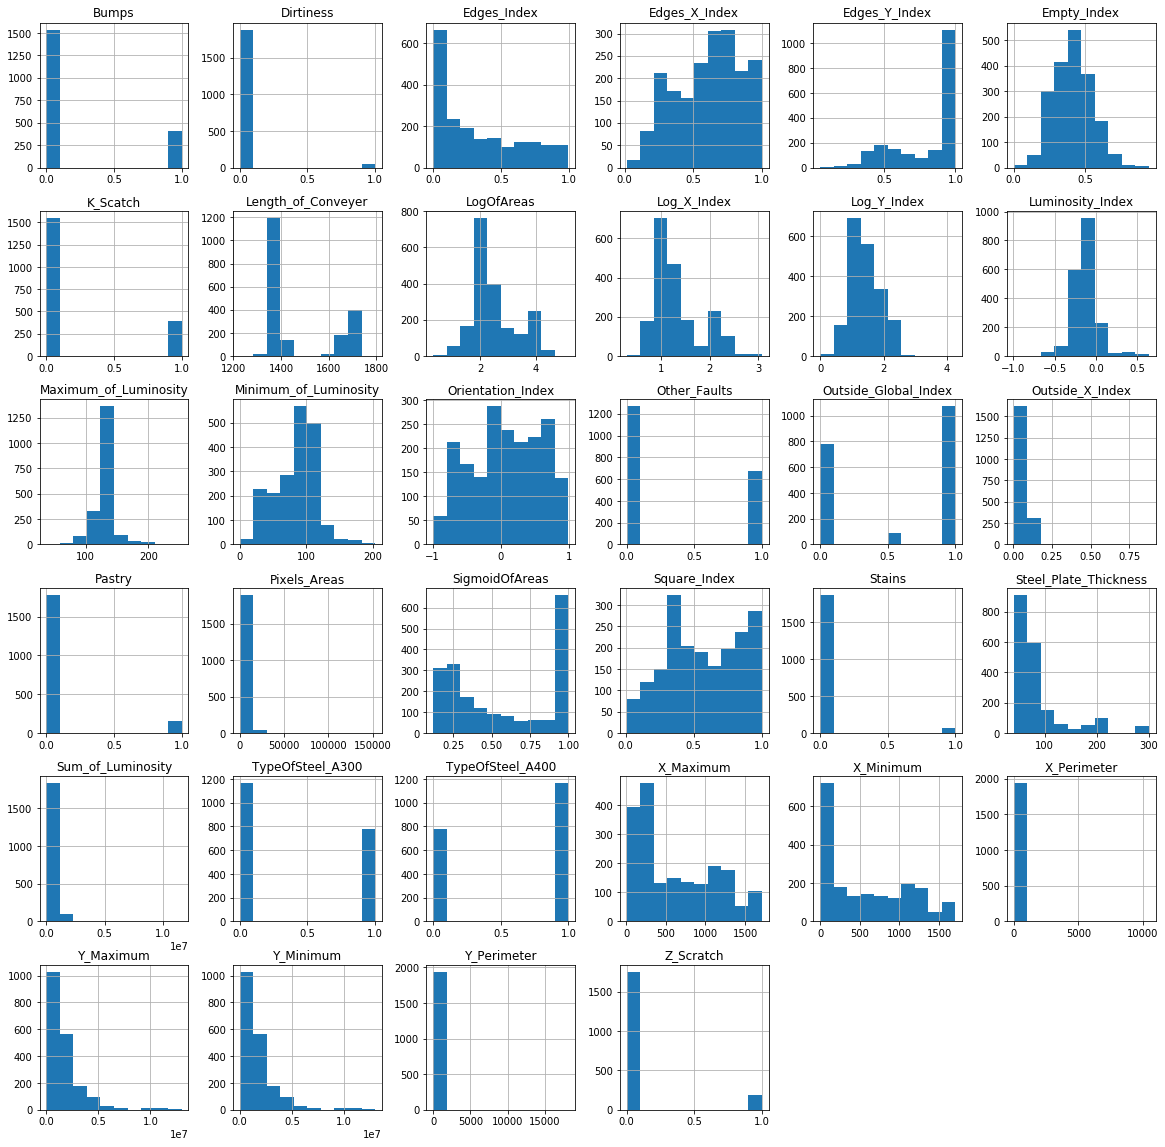

In [4]:
df_faults.hist(figsize=(20,20))
plt.show()

In [5]:
X1 = df_faults.values
y_dataframe =df_faults[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]]
features = X1[:,0:27]
x = pd.DataFrame(features)

In [6]:
y_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 7 columns):
Pastry          1941 non-null int64
Z_Scratch       1941 non-null int64
K_Scatch        1941 non-null int64
Stains          1941 non-null int64
Dirtiness       1941 non-null int64
Bumps           1941 non-null int64
Other_Faults    1941 non-null int64
dtypes: int64(7)
memory usage: 106.2 KB


In [7]:
type(y_dataframe)

pandas.core.frame.DataFrame

In [8]:
y_dataframe.head()

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


#### Creating one column of fault types

In [9]:
y = []
for i in range(y_dataframe.shape[0]):
    if y_dataframe["Pastry"].values[i] == 1:
        y.append("Pastry")
    elif y_dataframe["Z_Scratch"].values[i] == 1:
        y.append("Z_Scratch")
    elif y_dataframe["K_Scatch"].values[i] == 1:
        y.append("K_Scatch")
    elif y_dataframe["Stains"].values[i] == 1:
        y.append("Stains")
    elif y_dataframe["Dirtiness"].values[i] == 1:
        y.append("Dirtiness")
    elif y_dataframe["Bumps"].values[i] == 1:
        y.append("Bumps")
    else:
        y.append("Other_Faults")

In [10]:
y=np.array(y)

#### Create a dataframe

In [11]:
faultstype= pd.DataFrame({'faults':y})

In [12]:
faultstype.head()

,faults
0,Pastry
1,Pastry
2,Pastry
3,Pastry
4,Pastry


#### Data Strandadization 

Using variables without standardization gives the variable with the larger range a larger weight in the analysis. Transforming the data to comparable scales can prevent this problem.

In [13]:
sc=StandardScaler()
X=sc.fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 42)

#### To know each of the functions of PCA visit the following link
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

#### Select top n influencial features
PCA(n). When we don't mention the "n", we get variance ratio for all the features

In [15]:
pca=PCA(10)
pca.fit(x_test)
pca.explained_variance_ratio_

array([0.30476441, 0.14616096, 0.11182199, 0.07974027, 0.06714925,
       0.05728127, 0.05302463, 0.03905959, 0.03041487, 0.02995745])

In [16]:
pca_train=pca.transform(x_train)
pca_test=pca.transform(x_test)
pca_train=x_train
pca_test=x_test

In [17]:
type(x_train)

numpy.ndarray

In [18]:
x_train

array([[ 0.43388946,  0.42821284, -0.51585475, ..., -0.28375588,
         0.94739768,  1.20601809],
       [-1.01456035, -0.844151  , -0.54361554, ..., -1.40330117,
        -0.40204094,  1.22163552],
       [ 1.33676931,  1.37695808, -0.80976421, ..., -1.60859774,
         0.7907364 ,  0.02852258],
       ...,
       [ 0.08426364,  0.00811167,  0.30298501, ...,  0.89869644,
         0.20443322, -1.10153129],
       [-0.67453964, -0.78183934,  0.81377141, ...,  0.0333754 ,
         0.0840797 , -1.1492676 ],
       [ 0.48191498,  0.45032343, -0.46783943, ...,  0.3515052 ,
         0.03432461,  0.72040432]])

In [19]:
type(pca_train)

numpy.ndarray

In [20]:
pca_train

array([[ 0.43388946,  0.42821284, -0.51585475, ..., -0.28375588,
         0.94739768,  1.20601809],
       [-1.01456035, -0.844151  , -0.54361554, ..., -1.40330117,
        -0.40204094,  1.22163552],
       [ 1.33676931,  1.37695808, -0.80976421, ..., -1.60859774,
         0.7907364 ,  0.02852258],
       ...,
       [ 0.08426364,  0.00811167,  0.30298501, ...,  0.89869644,
         0.20443322, -1.10153129],
       [-0.67453964, -0.78183934,  0.81377141, ...,  0.0333754 ,
         0.0840797 , -1.1492676 ],
       [ 0.48191498,  0.45032343, -0.46783943, ...,  0.3515052 ,
         0.03432461,  0.72040432]])

In [21]:
pca_test

array([[ 1.04861617,  1.07746011, -0.25721234, ...,  0.48730449,
        -0.35094112,  1.22163552],
       [ 1.92268071,  1.99404449, -0.74015566, ...,  0.94822324,
        -1.53228824,  1.22163552],
       [ 2.00912665,  2.03022545,  0.25072082, ...,  0.14101631,
        -1.23510245, -0.96775177],
       ...,
       [ 1.39439994,  1.38700834, -0.11894557, ...,  0.14101631,
         0.40547066, -0.96775177],
       [ 1.01211677,  0.99906803,  0.36215966, ..., -1.22356682,
        -0.21579555, -0.99368261],
       [ 0.80272548,  0.76791188, -0.47895367, ..., -0.52939282,
        -0.08064998, -1.12068475]])

In [23]:
pca_score= np.zeros(6)
pca_accuracy= np.zeros(6)

##### Logistic Regression

In [24]:
Logistic_Regression = LR().fit(pca_train,y_train)
pca_score[0]=Logistic_Regression.score(pca_train,y_train)
predictions_LR = Logistic_Regression.predict(pca_test)
pca_accuracy[0]=accuracy_score(y_test, predictions_LR)

##### Decision Tree

In [25]:
Decision_Tree_Classifier = DTC().fit(pca_train,y_train)
pca_score[1]=Decision_Tree_Classifier.score(pca_train,y_train)
predictions_DTC = Decision_Tree_Classifier.predict(pca_test)
pca_accuracy[1]=accuracy_score(y_test, predictions_DTC)

##### SVC

In [26]:
from sklearn.svm import SVC
SVC = SVC().fit(pca_train,y_train)
pca_score[2]=SVC.score(pca_train,y_train)
predictions_SVC = SVC.predict(pca_test)
pca_accuracy[2]=accuracy_score(y_test, predictions_SVC)

##### KNN

In [27]:
K_Neighbors_Classifier = KNC(8).fit(pca_train,y_train)
pca_score[3]=K_Neighbors_Classifier.score(pca_train,y_train)
predictions_KNC = K_Neighbors_Classifier.predict(pca_test)
pca_accuracy[3]=accuracy_score(y_test, predictions_KNC)

##### Gaussian Naive Bayes classifier

In [28]:
from sklearn.naive_bayes import GaussianNB as GNB

GNB = GNB().fit(pca_train,y_train)
pca_score[4]=GNB.score(pca_train,y_train)
predictions_GNB= GNB.predict(pca_test)
pca_accuracy[4]=accuracy_score(y_test, predictions_GNB)

##### Random Forest

In [29]:
RF = RF().fit(pca_train,y_train)
pca_score[5]=RF.score(pca_train,y_train)
predictions_RF= RF.predict(pca_test)
pca_accuracy[5]=accuracy_score(y_test, predictions_RF)


#### Results

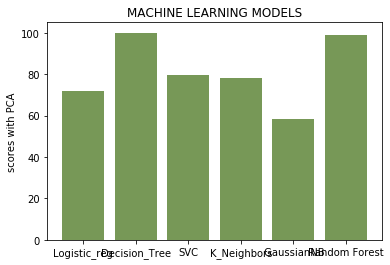

In [33]:
objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
SCORES = [pca_score[0]*100,pca_score[1]*100,pca_score[2]*100,pca_score[3]*100,pca_score[4]*100,pca_score[5]*100]

plt.bar(y_pos, SCORES,color='#557f2d' ,align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('scores with PCA')
plt.title('MACHINE LEARNING MODELS')

plt.show()

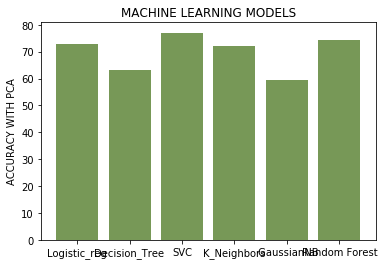

In [34]:
objects = ('Logistic_reg', 'Decision_Tree', 'SVC', 'K_Neighbors', ' GaussianNB','Random Forest')
y_pos = np.arange(len(objects))
ACCURACY = [pca_accuracy[0]*100,pca_accuracy[1]*100,pca_accuracy[2]*100,pca_accuracy[3]*100,pca_accuracy[4]*100,pca_accuracy[5]*100]

plt.bar(y_pos, ACCURACY,color='#557f2d', align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('ACCURACY WITH PCA')
plt.title('MACHINE LEARNING MODELS')

plt.show()